In [1]:
from __future__ import print_function, division
from PyAstronomy import pyasl
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from astropy import constants as const
from astropy import units as u
from scipy.interpolate import splrep,splev
from scipy import interpolate 
from scipy import signal
import scipy.integrate as it
from scipy.interpolate import interp1d
import matplotlib.colors as mcolors

c = 299792

import matplotlib as mpl

mpl.rc('figure',
       titlesize=24,
       figsize=(12,10),
      dpi=250,
      edgecolor='black',
    facecolor='white'
      )

mpl.rcParams['font.family'] = 'Arial' # 'sans-serif' , 'cursive' , 'fantasy','monospace' (e.g., Courier)

mpl.rc('lines',
       linewidth=2,
       color='r',
      linestyle='-',
      markersize=6,
      dash_joinstyle='miter', # miter/round/bevel
      dash_capstyle='butt',  #butt/round/projecting
      solid_joinstyle='miter',
      solid_capstyle='projecting',
      dashed_pattern= (2.8, 1.2),
       dashdot_pattern= (4.8, 1.2, 0.8, 1.2),
       dotted_pattern = (1.1, 1.1),
       scale_dashes = True
      )

mpl.rc('legend',
      fancybox=True, # if True, use a rounded box for the
      numpoints=1, # the number of marker points in the legend line
      markerscale =1,
      fontsize = 'medium',
      borderaxespad = 0.5) # the border between the axes and legend edge
             
mpl.rc('axes',
      facecolor='white',
      edgecolor='black',
      linewidth=1.9,
      grid=False,
      titlesize='large',
      labelsize='large',
      labelcolor='black',
      axisbelow='False') #draw axis gridlines and ticks below, patches (True); above patches but below, lines ('line'); or above all (False) 

mpl.rc('grid',
        color= 'lightgray',
       linestyle=':',
       linewidth=.6,
       alpha=.8)

mpl.rc('xtick',
      top=True, 
      bottom=True, 
      color ='k',
      labelsize = 'medium',
      direction = 'in') 

mpl.rc('xtick.major',
      size=5,
      width=2,
      pad=3.5,
      top=True,
      bottom=True)

mpl.rc('xtick.minor',
      size=5,
      width=2,
      pad=3.4,
      top=True,
      bottom=True)

mpl.rc('ytick',
      right=False, 
      left=True, 
      color ='k',
      labelsize = 'medium',
      direction = 'in') 

mpl.rc('ytick.major',
      size=5,
      width=2,
      pad=3.5,
      left=True,
      right=True)

mpl.rc('ytick.minor',
      size=5,
      width=2,
      pad=3.4,
      left=True,
      right=True)

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma], maxfev=5000)
    return popt

def cc(file1, file2, max_v=10):
    # Load in the Different Spectra
    wavelength1, flux1 = np.loadtxt(file1, unpack=True)
    wavelength2, flux2 = np.loadtxt(file2, unpack=True)
    
    # Get the correlation
    corr_raw = signal.correlate(flux1, flux2, mode='same')
    corr = [float(i)/sum(corr_raw) for i in corr_raw]
    
    # Do the Doppler Shift off of the central value
    shift = [(((wavelength1[len(wavelength1) // 2] - val) * c) / val) for val in wavelength1]
        
    # Interp the function
    f = interp1d(shift, corr, kind='cubic')
    x = np.linspace(-max_v, max_v, num=500)
    y = f(x)

    return x, y

def interp_x_y(x_input, y_input, max_v):
    f8 = interp1d(x_input, y_input / max(y_input), kind='cubic')
    x_new = np.linspace(-max_v, max_v, num=2500)
    y_new = f8(x_new)
    return x_new, y_new

-0.29999999999986215 194 1.0
-0.29999999999986215 194 1.0
-0.29999999999986215 194 1.0
1.4210854715202004e-13 200 1.0
0.30000000000014637 206 1.0
0.6000000000001506 212 1.0
0.9000000000001549 218 1.0
1.2000000000001592 224 1.0
0.9000000000001549 218 1.0
0.6000000000001506 212 1.0
0.30000000000014637 206 1.0
1.4210854715202004e-13 200 1.0
{'1.152': [-0.3, -0.3, -0.3, 0.0, 0.3, 0.6, 0.9, 1.2, 0.9, 0.6, 0.3, 0.0]}


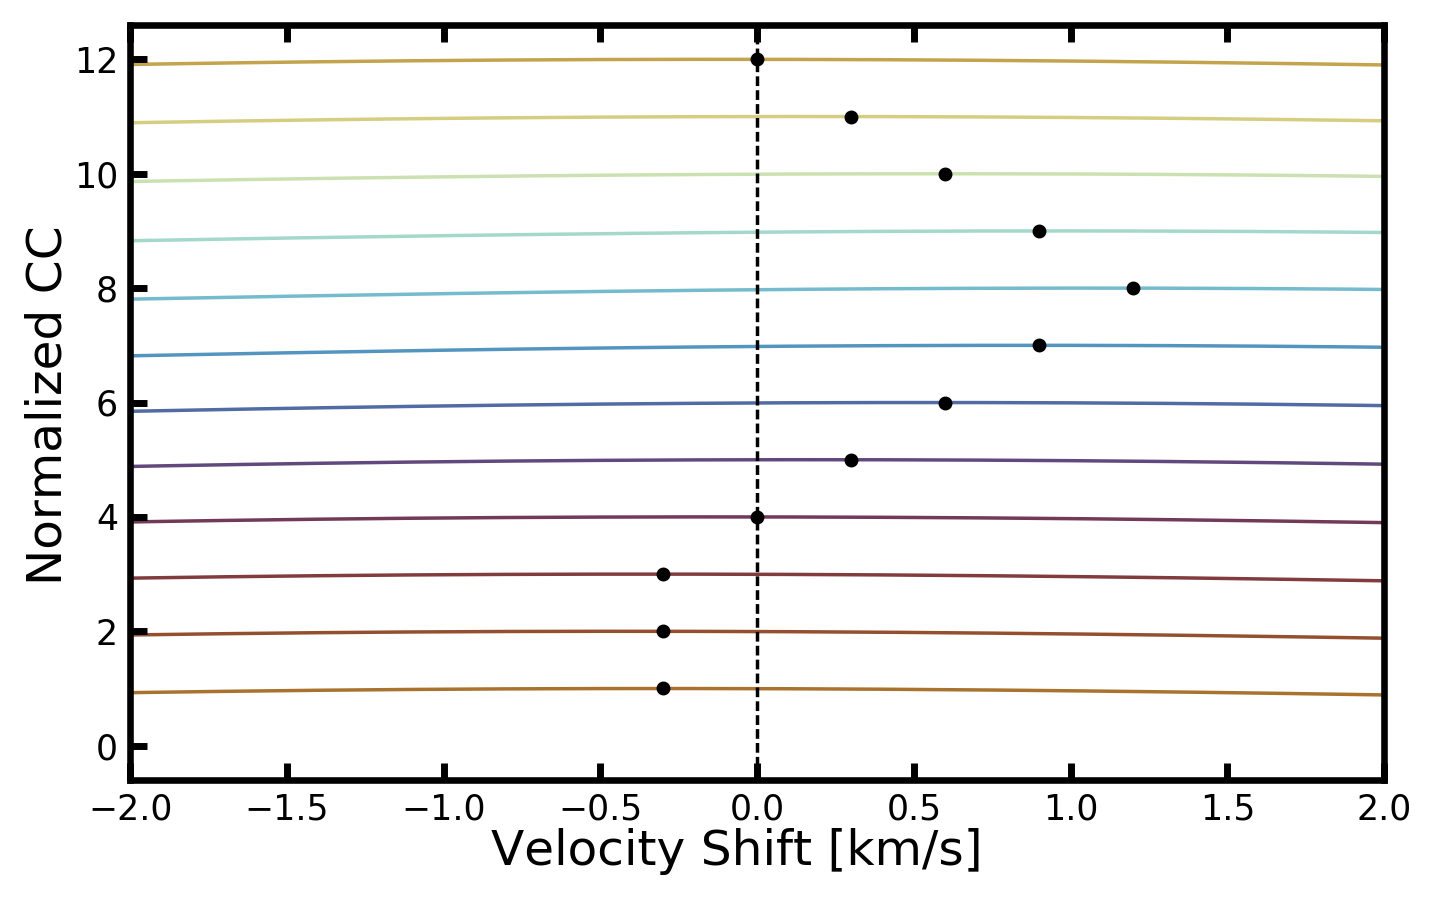

In [21]:
models = ['UPS-LOW-G-CLEAR-250', 'UPS-LOW-G-CLOUDY-250']
model = models[0]

golden_ratio = 1.618

fig, ax = plt.subplots(1, sharex=True, sharey=True,
                      figsize=(4 * golden_ratio, 4), gridspec_kw={'hspace': 0.15, 'wspace': 0.10})

val = 100
base = '/home/imalsky/Desktop/spectra/'

#inclinations = ['0.0', '0.39269908', '0.78539816', '1.17809725', '1.57079633']
inclinations = ['1.152']
#inclinations = ['0.0', '0.393', '0.785', '1.178', '1.5708']



phases = [0.0, 30.0, 60.0, 90.0, 120.0, 150.0, 180.0, 210.0,
          240.0, 270.0, 300.0, 330.0]

#phases = [0.0, 45.0, 90.0, 135.0, 180.0, 225.0, 270.0, 315.0]


#buda, batlow, roma, 
cm_name = 'romaO'
cm_file = np.loadtxt(f'ScientificColourMaps6/{cm_name}/{cm_name}.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[::-1])
colors = np.linspace(0, 256, len(phases) + 1)

test_dictionary = {}

j = 0
for inc in inclinations:
    running_sigma = 0
    inc = str(inc)
    test_dictionary[inc] = []
    
    i = 0
    for phase in phases:
        phase = str(phase)
        
        color_val = int(colors[i]) - 64
        if color_val < 0:
            color_val = color_val + 256   

        file1 = base + 'Spec_0_{}_phase_{}_inc_{}000.00.dat'.format(model, phase, inc)
        file2 = base + 'Spec_1_{}_phase_{}_inc_{}000.00.dat'.format(model, phase, inc)
        w1, f1 = np.loadtxt(file1, unpack=True)
        w2, f2 = np.loadtxt(file2, unpack=True)

        # Get the cross correlation
        rv2, cc2 = pyasl.crosscorrRV(w2, f2, w1, f1, -10, 10, 0.05, skipedge=val)
        x2, y2 = rv2, cc2
        y2 = np.asarray([(i - min(y2)) / (max(y2) - min(y2)) for i in y2])
        
        ax.plot(x2, y2 + i, color=my_colors(color_val), linestyle='solid',
                linewidth=1.0, label='Winds and Rotation')
        
        ax.plot(x2[np.argmax(y2)], 1 + i, 'k.')
        
        print (x2[np.argmax(y2)], np.argmax(y2), max(y2))
        
        test_dictionary[inc].append(np.round(x2[np.argmax(y2)], 5))
    

        i = i + 1
    j = j +1

    ax.axvline(linewidth=1, color='k',linestyle='dashed')
    #ax.set_title('Inclination: ' + inc)

    ax.set_xlim(-2, 2)
    #ax.set_ylim(0, 7)

    #ax.legend(loc='lower right')
    fig.text(0.5, 0.04, 'Velocity Shift [km/s]', ha='center', fontsize=14)
    fig.text(0.06, 0.5, 'Normalized CC', va='center', rotation='vertical', fontsize=14)
    fig.savefig('/home/imalsky/Desktop/test-CC-{}-{}.png'.format(model, inc), dpi=250, bbox_inches='tight')
    #plt.cla()
    print (test_dictionary)



In [1]:
ups_clear = [-0.478, -0.006, 0.33, 0.638, 0.794, 0.678, 0.314, -0.578, -0.042, -0.286, -0.51, -0.302]
ups_cloudy = [0.122, -1.298, 0.546, 2.23, 3.342, -0.634, 0.086, 0.634, 0.202, -0.066, -3.954, -2.546]

clear_1 = [-0.254, 0.21, 1.082, 1.31, -0.038, -0.314, -0.878, -0.538]
clear_2 = [-0.378, 0.166, 1.01, 1.286, 0.094, -0.338, -0.814, -0.51]
clear_3 = [-0.546, 0.118, 0.846, 1.126, 0.326, -0.326, -0.694, -0.434]
clear_4 = [-0.466, 0.162, 0.622, 0.742, 0.31, -0.166, -0.554, -0.29]
clear_5 = [0.03, 0.03, 0.03, 0.026, 0.026, 0.03, 0.026, 0.026]

cloudy_1 = [-3.282, -0.554, 2.422, 4.634, 1.706, 6.122, -2.682, -2.422]
cloudy_2 = [-3.058, -0.59, 2.214, 4.21, 1.582, 2.546, -2.986, -2.51]
cloudy_3 = [-1.37, -0.646, 1.838, 0.358, 0.826, 0.698, -2.878, -2.118]
cloudy_4 = [-0.022, -0.186, 1.65, -1.058, -0.23, -0.174, 0.854, -1.586]
cloudy_5 = [-0.21, -0.238, -0.23, -0.234, -0.226, -0.15, -0.106, -0.246]


In [2]:

fig, ax = plt.subplots(1, sharex=True, sharey=True, figsize=(12,5))

from scipy.interpolate import interp1d

phases = [0.0, 30.0, 60.0, 90.0, 120.0, 150.0,
          180.0, 210.0, 240.0, 270.0, 300.0, 330.0]

phases2 = [0.0, 45.0, 90.0, 135.0, 180.0, 225.0, 270.0, 315.0]
    
ax.plot(phases, ups_clear, color='black', linestyle='dotted', 
        linewidth=5, label=r'Clear')
"""
ax.plot(phases, ups_cloudy, color='red', linestyle='dotted', 
        linewidth=5, label=r'Cloudy')

ax.plot(phases2, cloudy_1, color='green', alpha=1.0, label=r'Cloudy 90$^\circ$')
ax.plot(phases2, cloudy_2, color='green', alpha=0.8, label=r'67.5$^\circ$')
ax.plot(phases2, cloudy_3, color='green', alpha=0.6, label=r'45.0$^\circ$')
ax.plot(phases2, cloudy_4, color='green', alpha=0.4, label=r'22.5$^\circ$')
ax.plot(phases2, cloudy_5, color='green', alpha=0.2, label=r'0.0$^\circ$')
"""


ax.plot(phases2, clear_1, color='purple', alpha=1.0, label=r'90$^\circ$')
ax.plot(phases2, clear_2, color='purple', alpha=0.8, label=r'67.5$^\circ$')
ax.plot(phases2, clear_3, color='purple', alpha=0.6, label=r'45.0$^\circ$')
ax.plot(phases2, clear_4, color='purple', alpha=0.4, label=r'22.5$^\circ$')
ax.plot(phases2, clear_5, color='purple', alpha=0.2, label=r'0.0$^\circ$')


ax.set_ylabel('Net Doppler Shift [km/s]', fontsize=14, weight='bold')
ax.set_xlabel('Orbital Phase', fontsize=14, weight='bold')
ax.legend()
#ax.set_ylim(-1.2,1.5)
fig.savefig('/home/imalsky/Desktop/Clear-Net-Shift-{}.png'.format(model), dpi=250, bbox_inches='tight')

NameError: name 'plt' is not defined

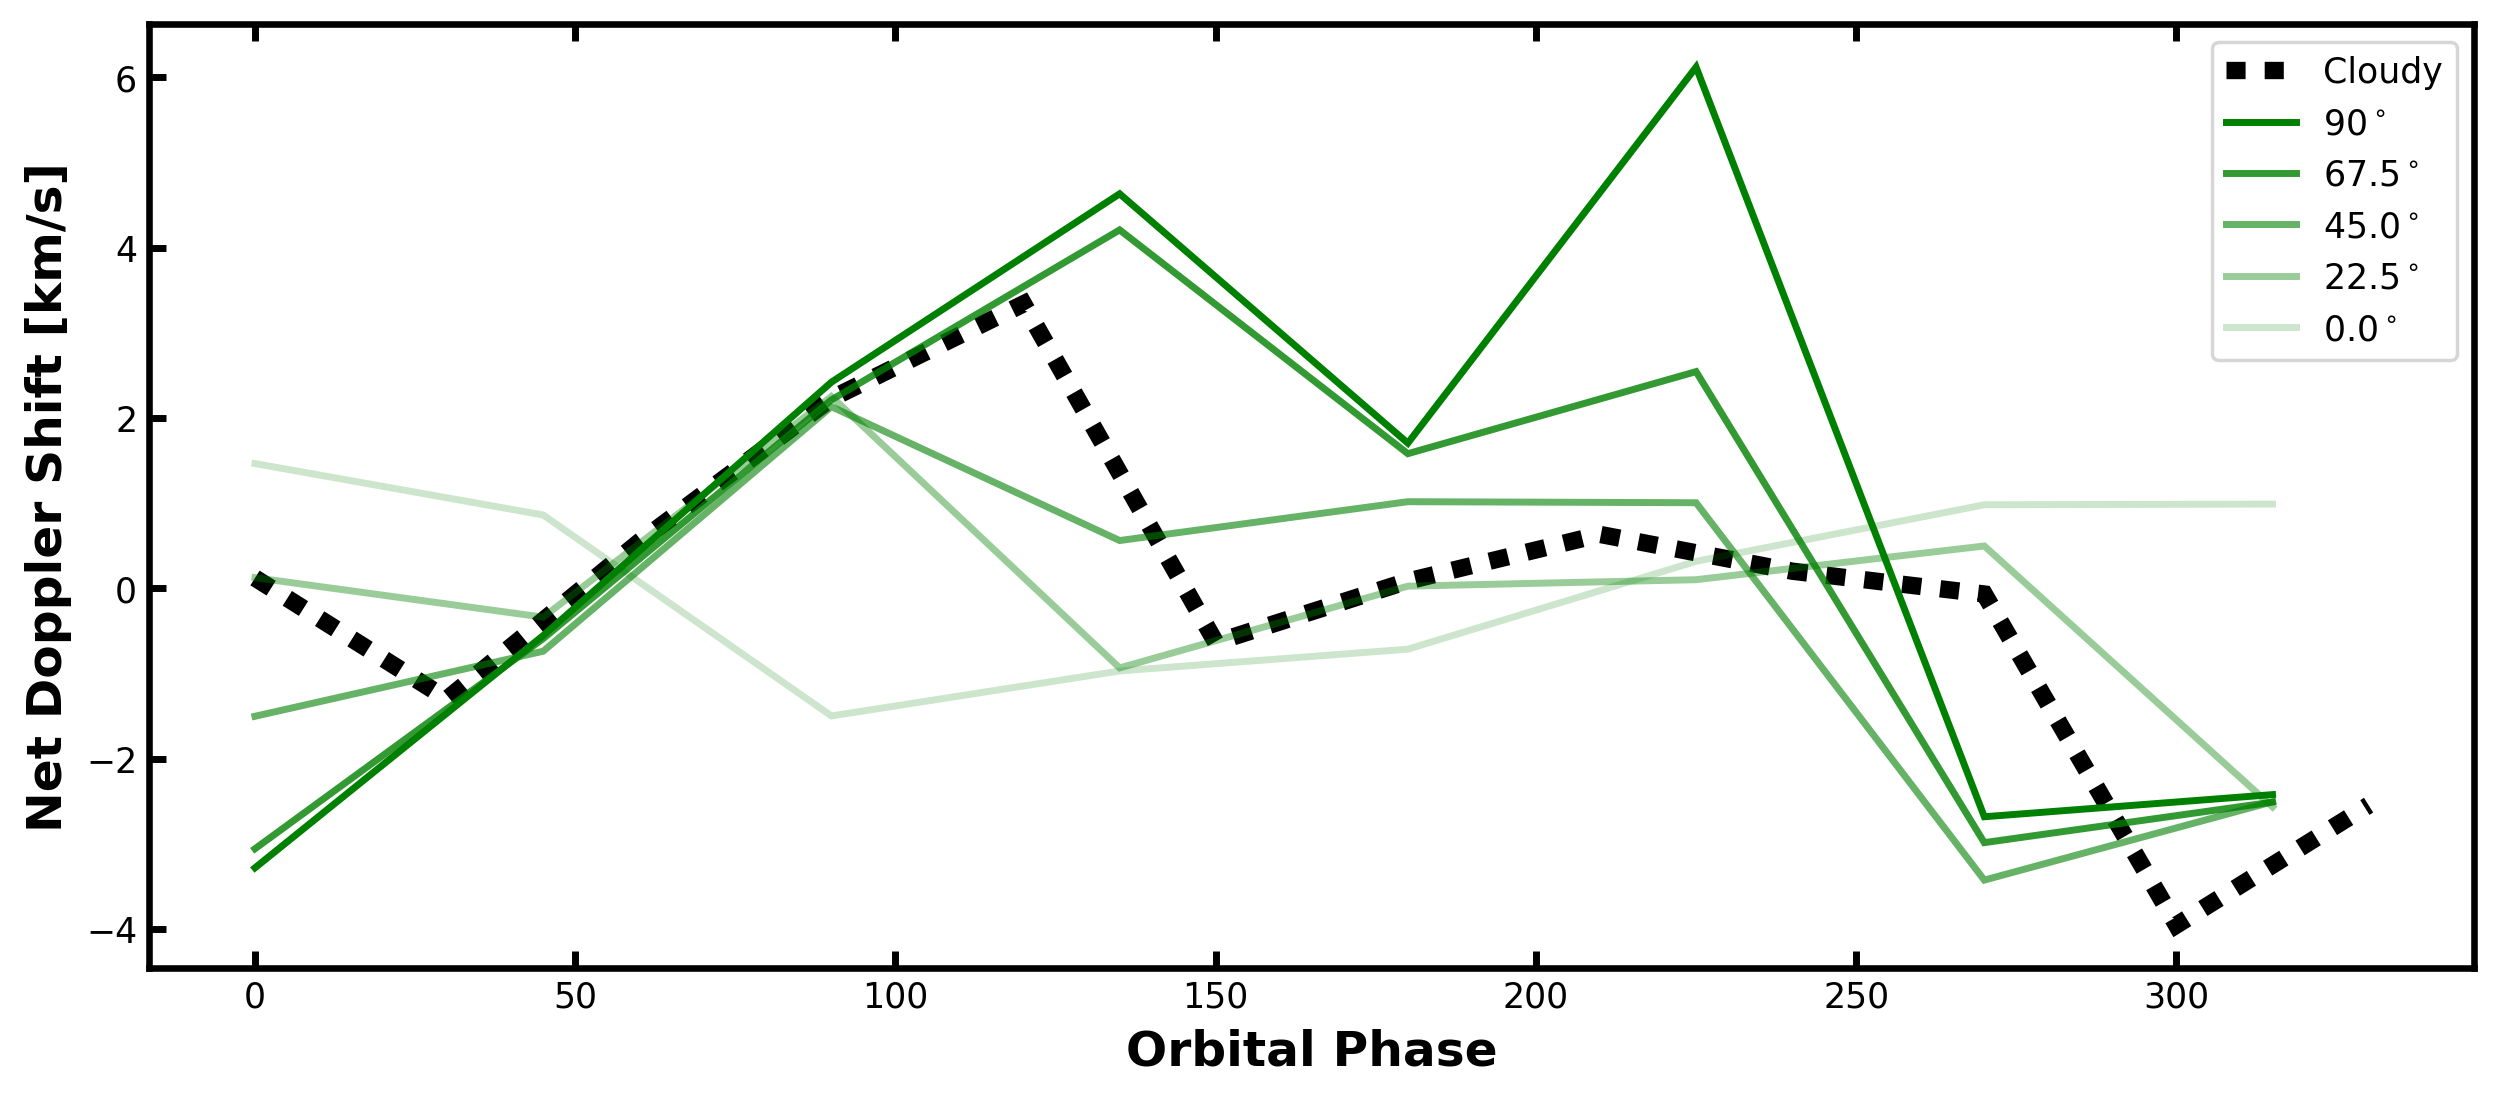

In [156]:

fig, ax = plt.subplots(1, sharex=True, sharey=True, figsize=(12,5))

from scipy.interpolate import interp1d

phases = [0.0, 30.0, 60.0, 90.0, 120.0, 150.0,
          180.0, 210.0, 240.0, 270.0, 300.0, 330.0]

phases2 = [0.0, 45.0, 90.0, 135.0, 180.0, 225.0, 270.0, 315.0]
    

ax.plot(phases, ups_cloudy, color='black', linestyle='dotted', 
        linewidth=5, label=r'Cloudy')

ax.plot(phases2, cloudy_1, color='green', alpha=1.0, label=r'90$^\circ$')
ax.plot(phases2, cloudy_2, color='green', alpha=0.8, label=r'67.5$^\circ$')
ax.plot(phases2, cloudy_3, color='green', alpha=0.6, label=r'45.0$^\circ$')
ax.plot(phases2, cloudy_4, color='green', alpha=0.4, label=r'22.5$^\circ$')
ax.plot(phases2, cloudy_5, color='green', alpha=0.2, label=r'0.0$^\circ$')


ax.set_ylabel('Net Doppler Shift [km/s]', fontsize=14, weight='bold')
ax.set_xlabel('Orbital Phase', fontsize=14, weight='bold')
ax.legend()
#ax.set_ylim(-1.2,1.5)
fig.savefig('/home/imalsky/Desktop/Cloudy-Net-Shift-{}.png'.format(model), dpi=250, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True,
                      figsize=(12, 12), gridspec_kw={'hspace': 0.15, 'wspace': 0.10})

val = 200
base = '/home/imalsky/Desktop/SPECTRA/'

inclinations = [0.0, 0.79, 1.57]
phases = [0.0, 60.0, 120.0, 180.0, 240.0, 300.0]

colors = plt.cm.plasma(np.linspace(0, 0.9, len(phases)))

test_dictionary = {}

j = 0
k = 0
for inc in inclinations:
    print ('On this inclination:', inc)
    inc = str(inc)
    
    test_dictionary[inc] = []
    
    
    i = 0
    
    if j > 4:
        k = 1
        j = 0
    
    for phase in phases:
        #phase = phase + 180
        if phase >= 360:
            phase = phase - 360

        phase = str(phase)

        file1 = base + 'Spec_0_UPS-BIG-G-CLEAR-250_phase_{}_inc_{}000.00.dat'.format(phase, inc)
        file2 = base + 'Spec_0_UPS-BIG-G-CLEAR-250_phase_{}_inc_{}000.00.dat''.format(phase, inc)
        #file3 = base + 'Exo_UpAndB_high_g_2_Final_UpAndB_high_g_phase_{}_inc_{}000.00.dat'.format(phase, inc)
        #file4 = base + 'Exo_UpAndB_high_g_3_Final_UpAndB_high_g_phase_{}_inc_{}000.00.dat'.format(phase, inc)

        w1, f1 = np.loadtxt(file1, unpack=True)
        w2, f2 = np.loadtxt(file2, unpack=True)
        #w3, f3 = np.loadtxt(file3, unpack=True)
        #w4, f4 = np.loadtxt(file4, unpack=True)

        rv1, cc1 = pyasl.crosscorrRV(w1, f1, w1, f1, -15., 15., 1, skipedge=val)
        rv2, cc2 = pyasl.crosscorrRV(w2, f2, w1, f1, -15., 15., 1, skipedge=val)
        #rv3, cc3 = pyasl.crosscorrRV(w3, f3, w1, f1, -15., 15., 1, skipedge=val)
        #rv4, cc4 = pyasl.crosscorrRV(w4, f4, w1, f1, -15., 15., 1, skipedge=val)

        x1, y1 = interp_x_y(rv1, cc1, 7.5)
        x2, y2 = interp_x_y(rv2, cc2, 7.5)
        #x3, y3 = interp_x_y(rv3, cc3, 7.5)
        #4, y4 = interp_x_y(rv4, cc4, 7.5)
        
        y1 = np.asarray([(i - min(y1)) / (max(y1) - min(y1)) for i in y1])
        y2 = np.asarray([(i - min(y2)) / (max(y2) - min(y2)) for i in y2])
        #y3 = np.asarray([(i - min(y3)) / (max(y3) - min(y3)) for i in y3])
        #y4 = np.asarray([(i - min(y4)) / (max(y4) - min(y4)) for i in y4])

        
        #f = open("/home/imalsky/Desktop/test.txt", "a")
        #f.write('phase: ' + str(phase) + ' inc: ' + str(inc)    + '\n')
        #f.write('No Doppler:         ' + str(np.round(x1[np.argmax(y1)], 2)) + '\n')
        #f.write('Winds and Rotation: ' + str(np.round(x2[np.argmax(y2)], 2)) + '\n')
        #f.write('Winds:              ' + str(np.round(x3[np.argmax(y3)], 2)) + '\n')
        #f.write('Rotation:           ' + str(np.round(x4[np.argmax(y4)], 2)) + '\n')
        #f.write('\n')
        #f.close()
        
        test_dictionary[inc].append(x2[np.argmax(y2)])
        
        
        if k == 0 and j == 0 and i == 0:
            ax[k,j].plot(x1, y1 + i, color=colors[i], linestyle='solid', linewidth=1.5, label='No Doppler Shifts')
            ax[k,j].plot(x2, y2 + i, color=colors[i], linestyle='dotted', linewidth=1.5, label='Winds and Rotation')
            #ax[k,j].plot(x3, y3 + i, color=colors[i], linestyle='dashed', linewidth=1.5, label='Winds Only')
            #ax[k,j].plot(x4, y4 + i, color=colors[i], linestyle='dashdot', linewidth=1.5, label='Rotation Only')
        else:
            ax[k,j].plot(x1, y1 + i, color=colors[i], linestyle='solid', linewidth=1.5)
            ax[k,j].plot(x2, y2 + i, color=colors[i], linestyle='dotted', linewidth=1.5)
            #ax[k,j].plot(x3, y3 + i, color=colors[i], linestyle='dashed', linewidth=1.5)
            #ax[k,j].plot(x4, y4 + i, color=colors[i], linestyle='dashdot', linewidth=1.5)

        i = i + 1
        
    ax[k,j].axvline(linewidth=1, color='k',linestyle='dashed')
    #temp_str = str(np.round((k + 1) * j * 0.3, 2))
    ax[k,j].set_title('Inclination: ' + inc)
    j = j + 1
    

ax[0, 0].legend(loc='lower right')
fig.text(0.5, 0.07, 'Velocity Shift [km/s]', ha='center', fontsize=16)
fig.text(0.08, 0.5, 'Normalized Cross Correlation', va='center', rotation='vertical', fontsize=16)
fig.savefig('/home/imalsky/Desktop/blah.pdf', dpi=250, bbox_inches='tight')

print (test_dictionary)


In [ ]:
test_dictionary ={'0.0': [-0.7112845138055217, -0.8253301320528212, -0.8913565426170464, -0.8673469387755102, -0.7893157262905159, -0.6752701080432173, -0.5552220888355341, -0.38115246098439304, -0.1710684273709484, 0.04501800720288163, 0.28511404561824794, 0.555222088835535, 0.8313325330132049, 1.059423769507804, 1.2034813925570234, 1.251500600240096, 1.1734693877551017, 0.8433373349339739, 0.2370948379351745, -0.15906362545017938, -0.35114045618247314, -0.435174069627851, -0.48319327731092443, -0.5792316926770704],
                  '0.175': [-0.6872749099639854, -0.7953181272509005, -0.8493397358943575, -0.8313325330132049, -0.7653061224489797, -0.6632653061224483, -0.543217286914766, -0.38115246098439304, -0.18307322929171654, 0.03301320528211349, 0.26110444177671077, 0.5252100840336134, 0.7953181272509013, 1.0234093637454986, 1.179471788715487, 1.2454981992797123, 1.1734693877551017, 0.8613445378151265, 0.25510204081632715, -0.15906362545017938, -0.35714285714285676, -0.4411764705882346, -0.5012004801920762, -0.5912364945978386],
                  '0.349': [-0.6512605042016801, -0.7232893157262898, -0.7653061224489797, -0.7593037214885952, -0.7112845138055217, -0.6272509003601439, -0.5252100840336134, -0.38715486194477755, -0.2010804321728692, -0.0030012004801918124, 0.21308523409363733, 0.45918367346938815, 0.7232893157262907, 0.963385354141657, 1.1374549819927982, 1.209483793517407, 1.1494597839135654, 0.8613445378151265, 0.2971188475390161, -0.15306122448979576, -0.3631452581032413, -0.45318127250900364, -0.5132052821128452, -0.5792316926770704],
                  '0.524': [-0.6152460984393757, -0.6572629051620646, -0.6872749099639854, -0.6872749099639854, -0.6452581032412965, -0.5792316926770704, -0.48919567827130805, -0.3691476590636249, -0.20708283313325282, -0.027010804321728088, 0.1710684273709484, 0.3991596638655466, 0.6392557022809129, 0.8793517406962792, 1.0654261704681876, 1.1494597839135654, 1.1014405762304929, 0.8313325330132049, 0.3151260504201687, -0.11704681872749045, -0.3391356542617041, -0.44717887154861913, -0.5132052821128452, -0.5612244897959178],
                  '0.698': [-0.5672268907563023, -0.6032412965186076, -0.6152460984393757, -0.6092436974789912, -0.5672268907563023, -0.5012004801920762, -0.42316926770708285, -0.32112845138055235, -0.18907563025210017, -0.039015606242497114, 0.135054021608644, 0.3331332533013205, 0.555222088835535, 0.7713085234093633, 0.9453781512605044, 1.017406962785115, 0.963385354141657, 0.7112845138055217, 0.2971188475390161, -0.04501800720288074, -0.2731092436974789, -0.3991596638655457, -0.4771908763505399, -0.5252100840336134],
                  '0.873': [-0.48919567827130805, -0.5192076830732288, -0.5252100840336134, -0.5012004801920762, -0.45918367346938727, -0.3991596638655457, -0.3331332533013205, -0.24309723889555812, -0.14105642256902762, -0.021008403361344463, 0.12905162064825948, 0.28511404561824794, 0.45918367346938815, 0.6272509003601439, 0.7533013205282124, 0.7893157262905159, 0.7172869147659071, 0.5132052821128461, 0.24309723889555812, 0.009003601440576325, -0.1710684273709484, -0.2971188475390152, -0.38115246098439304, -0.4411764705882346],
                  '1.047': [-0.3751500600240094, -0.4051620648259302, -0.4051620648259302, -0.38715486194477755, -0.3451380552220886, -0.29111644657863156, -0.23109243697478998, -0.15906362545017938, -0.07503001200480153, 0.015006002400960838, 0.11704681872749134, 0.2370948379351745, 0.35114045618247314, 0.45318127250900364, 0.5192076830732297, 0.5192076830732297, 0.44717887154862, 0.32112845138055235, 0.1710684273709484, 0.039015606242497114, -0.0690276110444179, -0.1710684273709484, -0.25510204081632626, -0.32112845138055235],
                  '1.222': [-0.23109243697478998, -0.26110444177671077, -0.2671068427370944, -0.25510204081632626, -0.22509003601440547, -0.17707082833133203, -0.1290516206482586, -0.07503001200480153, -0.021008403361344463, 0.039015606242497114, 0.1050420168067232, 0.1710684273709484, 0.22509003601440636, 0.2731092436974789, 0.29111644657863156, 0.2731092436974789, 0.2370948379351745, 0.17707082833133292, 0.11104441776710683, 0.04501800720288163, -0.01500600240095995, -0.08103241296518604, -0.14105642256902762, -0.19507803121248468],
                  '1.396': [-0.0990396158463378, -0.11104441776710683, -0.11104441776710683, -0.11104441776710683, -0.0990396158463378, -0.08103241296518604, -0.05702280912364888, -0.027010804321728088, -0.0030012004801918124, 0.027010804321728976, 0.057022809123649765, 0.08103241296518604, 0.09903961584633869, 0.11704681872749134, 0.12304921968787585, 0.11704681872749134, 0.09903961584633869, 0.08103241296518604, 0.057022809123649765, 0.027010804321728976, -0.0030012004801918124, -0.0330132052821126, -0.05702280912364888, -0.08103241296518604],
                  '1.571': [0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006, 0.0030012004801927006]}

In [ ]:
fig, ax = plt.subplots(1, sharex=True, sharey=True,
                       figsize=(8, 5), gridspec_kw={'hspace': 0.15, 'wspace': 0.10})
from scipy.interpolate import interp1d

phases = [0.0, 15.0, 30.0, 45.0, 60.0, 75.0, 90.0, 105.0,
         120.0, 135.0, 150.0, 165.0, 180.0, 195.0, 210.0,
         225.0, 240.0, 255.0, 270.0, 285.0, 300.0, 315.0, 330.0, 345.0]

colors = plt.cm.Blues(np.linspace(.3, 1, len(test_dictionary)))


i = 0
for key in test_dictionary:
    inclination = str(90 - (10 * i))
    
    #func_test = interp1d(phases, test_dictionary[key], kind='cubic')
    #new_x = np.linspace(0, 5/6, 100)
    
    #ax.plot(new_x, func_test(new_x), color=colors[i], linestyle='solid', 
    #        linewidth=1.5, label=r'Inc: ' + inclination[:4] + '$^{\circ}$')
    
    ax.plot(phases, test_dictionary[key], color=colors[i], linestyle='solid', 
            linewidth=1.5, label=r'Inc: ' + inclination[:4] + '$^{\circ}$')
    
    i = i + 1

ax.set_ylabel('Net Doppler Shift [km/s]')
ax.set_xlabel('Orbital Phase')
ax.legend()
fig.savefig('/home/imalsky/Desktop/grorobiiiitititi.pdf', dpi=250, bbox_inches='tight')
